In [1]:
import pandas as pd 
from pandas import datetime
import matplotlib.pyplot  as plt 

In [2]:
import seaborn 
%matplotlib inline

In [3]:
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')

In [4]:
series = pd.read_excel('sales-of-shampoo-over-a-three-ye.xls')

In [5]:
series['Month'] = series['Month'].apply(lambda s :'19'+s[2:]+'-01')

In [53]:
series['Month'] = series['Month'].apply(lambda s :pd.to_datetime(s,format='%Y-%m'))

In [63]:
series.dtypes

Month                                        datetime64[ns]
Sales of shampoo over a three year period           float64
dtype: object

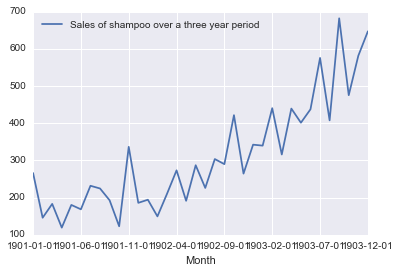

In [7]:
plt.figure(figsize=(12,8)) 
series.set_index('Month').plot()

In [64]:
X = series.set_index('Month')
train,test = X[0:-12]['Sales of shampoo over a three year period'],X[-12:]['Sales of shampoo over a three year period']

In [69]:
# train

In [56]:
history  = [x for x in train]
len(history)

24

In [57]:
plt.figure(figsize=(12,8))
# plt.plot()

In [58]:
predictions = list()

In [60]:
train

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
Name: Sales of shampoo over a three year period, dtype: float64

In [59]:
test

Month
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64

In [70]:
for i in range(len(test)):
    predictions.append(history[-1])
    history.append(test[i])

In [71]:
history
len(history)

36

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
import numpy as np 

In [74]:
from matplotlib import pyplot

In [75]:
rmse = np.sqrt(mean_squared_error(test,predictions))

In [76]:
rmse

136.76131884905664

In [83]:
test

Month
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64

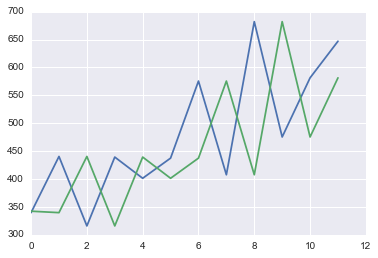

In [84]:
pyplot.plot(list(test))
pyplot.plot(predictions)

In [87]:
X['shift_value']=X.shift(1)

In [89]:
X.fillna(0,inplace=True)

In [91]:
X['diff_value'] = X['Sales of shampoo over a three year period'].diff(1)

In [97]:
X.iloc[1:].head()

,Sales of shampoo over a three year period,shift_value,diff_value
Month,,,
1901-02-01,145.9,266.0,-120.1
1901-03-01,183.1,145.9,37.2
1901-04-01,119.3,183.1,-63.8
1901-05-01,180.3,119.3,61.0
1901-06-01,168.5,180.3,-11.8


In [101]:
X2 = X.iloc[1:]

In [109]:
X.head(1)

,Sales of shampoo over a three year period,shift_value,diff_value
Month,,,
1901-01-01,266.0,0.0,NaN


In [103]:
X2.head(1)

,Sales of shampoo over a three year period,shift_value,diff_value
Month,,,
1901-02-01,145.9,266.0,-120.1


In [93]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
X3 =X['Sales of shampoo over a three year period']

In [111]:
scaler =MinMaxScaler(feature_range=(-1,1))
scaler = scaler.fit(X3)

C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [112]:
scaler_X3 = scaler.transform(X3)

C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [113]:
inverted_X3 =scaler.inverse_transform(scaler_X3)

C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [115]:
scaler_X3

array([-0.47858539, -0.90545584, -0.77323618, -1.        , -0.7831882 ,
       -0.82512884, -0.60014217, -0.6260885 , -0.73875955, -0.98720455,
       -0.22800782, -0.76328417, -0.73342811, -0.89266039, -0.6772703 ,
       -0.45263906, -0.74373556, -0.40394526, -0.62075706, -0.34494402,
       -0.39363782,  0.07446241, -0.48391683, -0.20739293, -0.21663409,
        0.1412831 , -0.30122623,  0.13737338,  0.00231029,  0.13062022,
        0.62146792,  0.02470233,  1.        ,  0.26532788,  0.64208281,
        0.87524436])

#### ------------综合